In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
logistica = pd.read_csv("C:/Users/LILIANA CARDONA/OneDrive/Escritorio/INGENIERIA SISTEMAS/C/6. Periodo 2023 II PERIODO 16-04 (1394)/2. ANÁLISIS DE DATOS/ETAPA 2/archive RLOG/framingham.csv")

In [4]:
logistica.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [22]:
logistica[['BMI','prevalentStroke']].head()

,BMI,prevalentStroke
0,26.97,0
1,28.73,0
2,25.34,0
3,28.58,0
4,23.10,0


<Axes: xlabel='BMI', ylabel='prevalentStroke'>

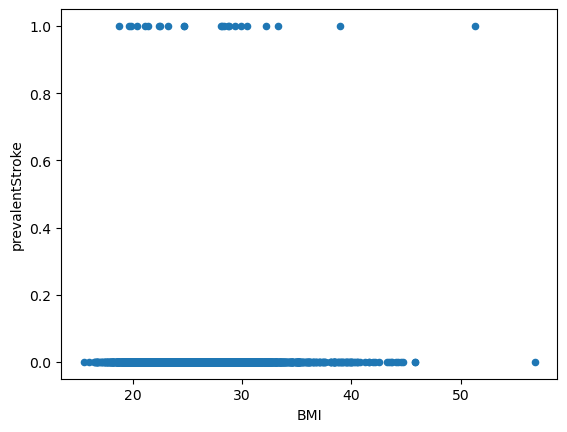

In [24]:
logistica[['BMI','prevalentStroke']].plot.scatter(x='BMI',y='prevalentStroke')

In [8]:
# pruebas de parametro
w = 0.09
b = -3.6

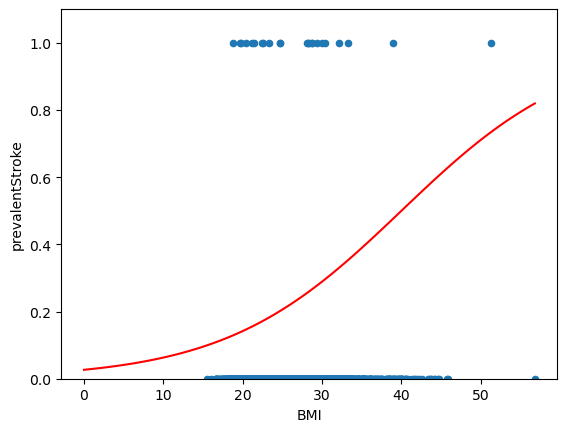

In [9]:
# puntos de la recta
x = np.linspace(0,logistica['BMI'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
logistica.plot.scatter(x='BMI',y='prevalentStroke')
plt.plot(x, y, '-r')
plt.ylim(0,logistica['prevalentStroke'].max()*1.1)
# plt.grid()
plt.show()

In [10]:
# calculo de las predicciones
logistica['sigmoid'] = 1/(1+np.exp(-(logistica['BMI']*w+b)))

# calculo de la funcion de error
logistica['loss_xi'] = -logistica['prevalentStroke']*np.log(logistica['sigmoid'])-(1-logistica['prevalentStroke'])*np.log(1-logistica['sigmoid'])
cost_j = logistica['loss_xi'].mean()
cost_j

0.26419438112988547

In [11]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [12]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [13]:
def sum_error_df(df):
    logistica['sigmoid'] = 1/(1+np.exp(-(logistica['BMI']*df['w']+df['b'])))
    logistica['loss_xi'] = -logistica['prevalentStroke']*np.log(logistica['sigmoid'])-(1-logistica['Outcome'])*np.log(1-logistica['sigmoid'])
    j_cost = logistica['loss_xi'].mean()
    return(j_cost)

In [14]:
df['error'] = df.apply(sum_error_df, axis=1)

In [15]:
df.sort_values(by=['error']).head()

,w,b,error
0,0.05,-4.00,0.080111
1,0.05,-3.99,0.080695
2,0.05,-3.98,0.081285
3,0.05,-3.97,0.081880
4,0.05,-3.96,0.082482


In [16]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [17]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,0.080111,0.080695,0.081285,0.081880,0.082482,0.083090,0.083704,0.084324,0.084951,0.085583,...,0.163702,0.165079,0.166467,0.167868,0.169282,0.170707,0.172146,0.173597,0.175061,0.176537
0.06,0.097891,0.098652,0.099421,0.100198,0.100982,0.101774,0.102574,0.103381,0.104196,0.105020,...,0.204691,0.206420,0.208163,0.209921,0.211694,0.213481,0.215283,0.217101,0.218933,0.220781
0.07,0.121124,0.122107,0.123100,0.124103,0.125114,0.126135,0.127166,0.128207,0.129257,0.130316,...,0.256050,0.258193,0.260354,0.262531,0.264725,0.266937,0.269166,0.271412,0.273676,0.275957
0.08,0.151130,0.152387,0.153655,0.154934,0.156225,0.157527,0.158841,0.160167,0.161504,0.162853,...,0.319442,0.322061,0.324699,0.327356,0.330032,0.332729,0.335444,0.338179,0.340934,0.343709
0.09,0.189388,0.190974,0.192574,0.194187,0.195814,0.197454,0.199109,0.200777,0.202459,0.204155,...,0.396390,0.399538,0.402708,0.405899,0.409111,0.412345,0.415600,0.418877,0.422175,0.425495


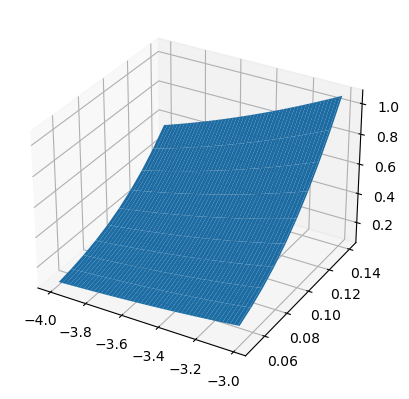

In [19]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)